# ASSIGNMENT 8

# Iris Dataset

# Logistic Regression from scratch

In [1]:
#importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\naren\Desktop\DESKTOP MAMTA\STUDY BSC DATA ANALYTICS\semester 3 bsc Data Analytics\ML\IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#encoding the target variables (setosa: 0,versicolor: 1,viginica: 2)
keys = data['species'].unique()
values = [i for i in range(len(keys))]
mapping = dict(zip(keys,values))
data['species'] = data['species'].replace(keys,values)

In [3]:
#shuffling the data
data = data.to_numpy()
np.random.shuffle(data)

In [4]:
#splitting training and testing dataset
X = data[:,:-1]
Y = data[:,-1]
test_train_ratio = 0.2
num_testing_example = int(test_train_ratio*(X.shape[0]))
num_training_example = X.shape[0]-num_testing_example
X_train = X[:num_training_example]
Y_train = Y[:num_training_example]
X_test = X[num_training_example:]
Y_test = Y[num_training_example:]

In [5]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T))))

In [6]:
def cost(X, y, theta):
    y1 = hypothesis(theta,X)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [7]:
y = Y_train
y1 = np.zeros([X_train.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y1)):
        if y[j] == np.unique(y)[i]:
            y1[j, i] = 1
        else: 
            y1[j, i] = 0

In [8]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        for j in range(0,3):
            theta = np.array(theta)
            h = hypothesis(theta[:,j], X)
            for k in range(0, theta.shape[0]):
                theta[k, j] -= (alpha/m) * np.sum((h-y[:, j])*X[:, k])
    return theta, cost

In [9]:
theta = np.zeros([X_train.shape[1], y1.shape[1]])
theta = gradient_descent(X_train, y1, theta, 0.001, 100000)
theta

(array([[ 0.56700013,  0.58378026, -2.20391428],
        [ 1.83351378, -1.51286256, -2.10917231],
        [-2.78800281,  0.57851076,  3.07131246],
        [-1.24158663, -1.52775509,  2.86949234]]),
 <function __main__.cost(X, y, theta)>)

In [10]:
output = []
for i in range(0,3):
    h = hypothesis(theta[0][:,i], X_test)
    output.append(h)

In [11]:
y = Y_test
y2 = np.zeros([X_test.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y2)):
        if y[j] == np.unique(y)[i]:
            y2[j, i] = 1
        else: 
            y2[j, i] = 0
accuracy = 0
y_pred = []
for col in range(0,3):
    for row in range(len(y2)):
        if y2[row, col] == 1 and output[col][row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X_test)
print("Accuracy = ",accuracy)

Accuracy =  0.7666666666666667


In [12]:
def y_change(y, cl):
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr
y_pred =[0]*len(y)
y_uniq = np.unique(Y_test)
for i in range(0, len(y_uniq)):
    y_tr = y_change(y, y_uniq[i])
    for k in range(0, len(y)):
        if y_tr[k] == 1 and output[i][k] >= 0.5:
            y_pred[k] = int(y_uniq[i])

In [13]:
#precision,recall, f1_score
def regression_metrics(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(Y_test,y_pred)

'f1_score = 0.7666666666666667, recall = 0.7666666666666667, precision = 0.7666666666666667'

In [14]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [15]:
y_pred1 = pd.Series(y_pred)
y_test1 = pd.Series(Y_test)
cm_new = pd.crosstab(y_test1,y_pred1)
cm_new

col_0,0,1,2
row_0,,,
0.0,12,0,0
1.0,7,1,0
2.0,0,0,10


In [16]:
def regression_metrics(y,y_pred):
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(y)):
        for j in np.unique(y):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(Y_test,y_pred)

'f1_score = 0.7666666666666667, recall = 0.7666666666666667, precision = 0.7666666666666667'

Text(0.5, 63.222222222222186, 'Predicted label')

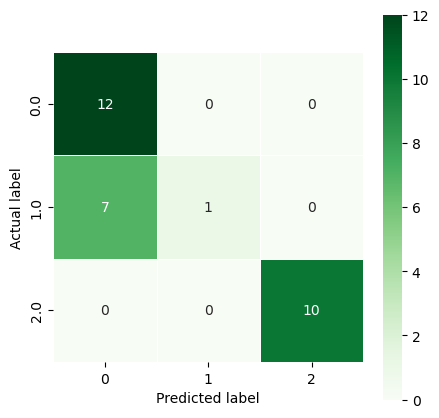

In [17]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_new,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Implementing logistic regression from sklearn

In [18]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred,Y_test))

0.9666666666666667


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

Text(0.5, 63.222222222222186, 'Predicted label')

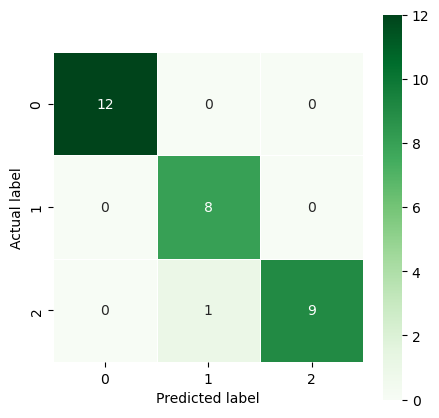

In [20]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# MNIST DATASET

In [21]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
test_data, test_target = (mnist["data"][60000:]).to_numpy(int),(mnist["target"][60000:]).to_numpy(int)
train_data,train_target = (mnist['data'][:60000]).to_numpy(int),(mnist['target'][:60000]).to_numpy(int)

C:\Users\naren\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(train_data,train_target)
Y_pred = regr.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred,test_target))

0.9255


C:\Users\naren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_target,Y_pred)
cm1

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

Text(0.5, 118.72222222222216, 'Predicted label')

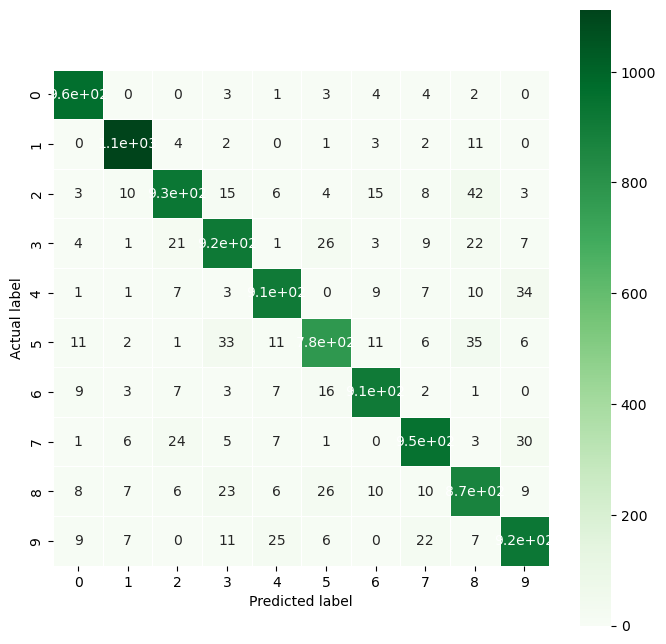

In [24]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.heatmap(cm1,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [25]:
#precision,recall, f1_score
def regression_metrics(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    
    correct = 0
    for x in range(len(y)):
        if y[x]==y_pred[x]:
            correct+=1
    accuracy = correct/len(y)
    return f"Accuracy = {accuracy}, f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(test_target,Y_pred)

'Accuracy = 0.9255, f1_score = 0.9255, recall = 0.9255, precision = 0.9255'

In [27]:
#ROC curve
pred_prob = regr.predict_proba(test_data)
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(test_target, pred_prob[:,1], pos_label=1)

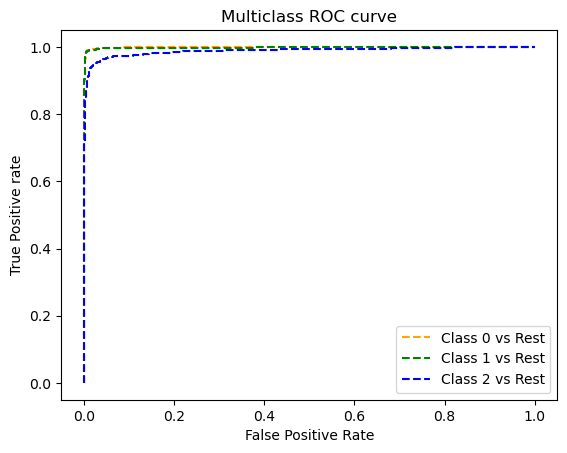

In [28]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_target, pred_prob[:,i], pos_label=i)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')